# PoliticIT

## Setup

In [ ]:
import pandas as pd


In [ ]:

def groupTweetsByCluster(df_):
  df = df_.copy()
  df.dropna(inplace=True)
  df['tweet'] = df.groupby(['label'])['tweet'].transform(lambda x : ' '.join(x))

  return df[df.columns[1:]].drop_duplicates()

## Data Exploration

This section explore the dataset provided for the EVALITA 2023 Task.

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

df_train = pd.read_csv('gdrive/My Drive/HLT_proj/train.csv')

df_train['tweet'].fillna(" ", inplace=True)
df_train.info()

Mounted at /content/gdrive
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103840 entries, 0 to 103839
Data columns (total 5 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   label                103840 non-null  object
 1   gender               103840 non-null  object
 2   ideology_binary      103840 non-null  object
 3   ideology_multiclass  103840 non-null  object
 4   tweet                103840 non-null  object
dtypes: object(5)
memory usage: 4.0+ MB


In [ ]:
df_test = pd.read_csv('gdrive/My Drive/HLT_proj/test.csv')

df_test['tweet'].fillna(" ", inplace=True)
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36240 entries, 0 to 36239
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   label                36240 non-null  object
 1   gender               36240 non-null  object
 2   ideology_binary      36240 non-null  object
 3   ideology_multiclass  36240 non-null  object
 4   tweet                36240 non-null  object
dtypes: object(5)
memory usage: 1.4+ MB


Data exploration

In [ ]:
df = {}
df['train'] = df_train
df['test'] = df_test


Rimuovi stop words

In [ ]:
df['train']['filtered_tweet'] = df['train']['tweet'].apply(lambda x: ' '.join([word for word in x.split() if word not in NO_WORDS]))


In [ ]:
for l in ('train', 'test'):
  print(l + " ")
  print("Number tweet: " + str(len(df[l])))
  print("Number of cluster of users: " + str(len(df[l]['label'].unique())))
  print("Tweets per cluster: ")
  #print(df[l].groupby(['label']).size().value_counts())
  print(df[l].groupby('label')['tweet'].count().describe())


  if(l == 'train'):
    print("-----------------------------")

train 
Number tweet: 103840
Number of cluster of users: 1298
Tweets per cluster: 
count    1298.0
mean       80.0
std         0.0
min        80.0
25%        80.0
50%        80.0
75%        80.0
max        80.0
Name: tweet, dtype: float64
-----------------------------
test 
Number tweet: 36240
Number of cluster of users: 453
Tweets per cluster: 
count    453.0
mean      80.0
std        0.0
min       80.0
25%       80.0
50%       80.0
75%       80.0
max       80.0
Name: tweet, dtype: float64


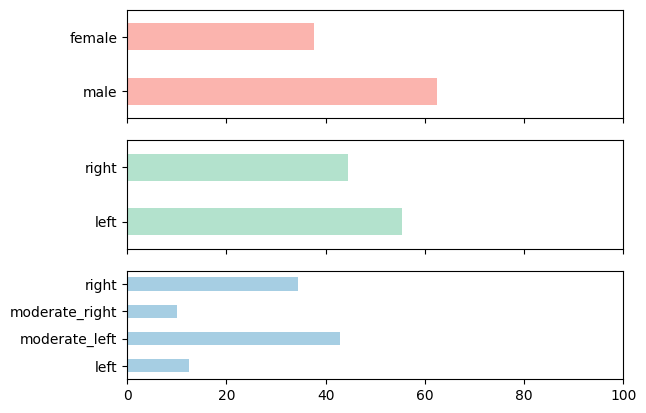

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

#to start plotting
fig, axes = plt.subplots(nrows=3, ncols=1)

xticks = [0, 20, 40, 60, 80 ,100]

df['train']['gender'].value_counts(normalize=True).mul(100).plot(kind='barh', ax=axes[0], sharex=True, xticks=xticks, colormap='Pastel1')

df['train']['ideology_binary'].value_counts(normalize=True, sort=False).mul(100).loc[["left", "right"]].plot(kind='barh', ax=axes[1], sharex=True, xticks=xticks, colormap='Pastel2')
df['train']['ideology_multiclass'].value_counts(normalize=True, sort=False).mul(100).loc[["left", "moderate_left", "moderate_right", "right"]].plot(kind='barh', ax=axes[2], sharex=True, xticks=xticks, colormap='Paired')

plt.show()

In [ ]:
!pip install transformers
!pip install tokenizers

%tensorflow_version 2.x

!pip install pandas
!pip install numpy
!pip install sklearn
!pip install tensorflow
!pip install matplotlib

import tensorflow as tf
print('TensorFlow:', tf.__version__)

In [ ]:
!pip install -U spacy

In [ ]:
import subprocess
subprocess.call('python -m spacy download it_core_news_sm', shell=True)

0

In [ ]:
import spacy

nlp = spacy.load("it_core_news_sm")


In [ ]:
df = df['train']

In [ ]:
NO_WORDS = ['POLITICAL_PARTY', '@user', 'user', '[POLITICAL_PARTY]', '[POLITICIAN]', '@politician', '@[POLITICAL_PARTY]', '#[POLITICIAN]',
            '#[POLITICAL_PARTY]', '#[POLITICIAN]', 'POLITICIAN', '@[POLITICAL_PARTY', '@[POLITICIAN', '@user[POLITICAL_PARTY', '\u2066@user\u2069', '\u2066@politician\u2069']

In [ ]:
import re

wordList = list()
for i in df.tweet.values:
    for token in nlp(i):
        #if (not token.is_stop) and (not token.text in NO_WORDS) and (not token.is_punct):
        if (not token.is_stop) and (not token.is_punct):
          wordList.append(token.text)

In [ ]:
gender_wordList = dict()
for gender in ['male', 'female']:
  new_wl = list()
  for i in df[df['gender'] == gender].tweet.values:
      for token in nlp(i):
        if (not token.is_stop) and (not token.text in NO_WORDS):
          new_wl.append(token.text)
  gender_wordList[gender] = new_wl

In [ ]:
ideology_wordList = dict()
for ideology in ['left', 'right']:
  new_wl = list()
  for i in df[df['ideology_binary'] == ideology].tweet.values:
      for token in nlp(i):
        if (not token.is_stop) and (not token.text in NO_WORDS):
          new_wl.append(token.text)
  ideology_wordList[ideology] = new_wl

In [ ]:
ideology_multiclass_wordList = dict()
for ideology in ['left', 'moderate_left', 'moderate_right', 'right']:
  new_wl = list()
  for i in df[df['ideology_multiclass'] == ideology].tweet.values:
      for token in nlp(i):
        if (not token.is_stop) and (not token.text in NO_WORDS):
          new_wl.append(token.text)
  ideology_multiclass_wordList[ideology] = new_wl


In [ ]:
def no_words(x):
  return x in NO_WORDS

In [ ]:
stop_list = ['POLITICIAN', 'POLITICAL_PARTY']

In [ ]:
for sex in ['male', 'female']:
  gender_wordList[sex][:] = [x for x in gender_wordList[sex] if (not no_words(x) and "POLITICAL_PARTY" not in x)]

for id in ['left', 'right']:
  ideology_wordList[id][:] = [x for x in ideology_wordList[id] if (not no_words(x) and "POLITICAL_PARTY" not in x)]
for id in ['left', 'right', 'moderate_left', 'moderate_right']:
  ideology_multiclass_wordList[id][:] = [x for x in ideology_multiclass_wordList[id] if (not no_words(x) and "POLITICAL_PARTY" not in x)]

**Gender Wordcloud**

In [ ]:
from wordcloud import WordCloud

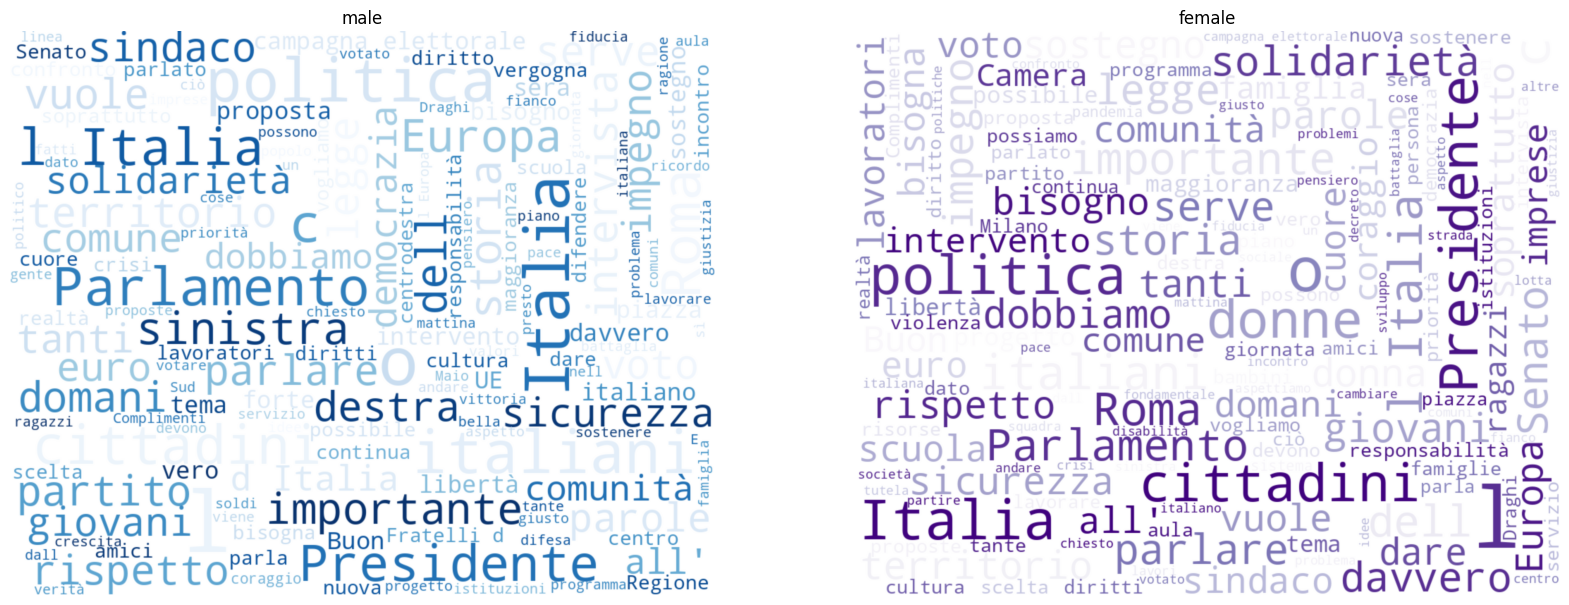

In [ ]:
figure, axis = plt.subplots(1, 2, figsize=(20,20))

colormaps = ['Blues', 'Purples']
for i, gender in enumerate(['male', 'female']):
  word_cloud = WordCloud(width = 1000,
                       height = 800,
                       colormap = colormaps[i],
                       margin = 0,
                       max_words = 150,
                       max_font_size = 120, min_font_size = 15,
                       background_color = "white").generate(" ".join(gender_wordList[gender]))

  axis[i].imshow(word_cloud, interpolation = "gaussian")
  axis[i].axis("off")
  axis[i].set_title(gender)

  word_cloud.to_file("img/" + gender + "_wc.png")

**Binary Ideology Wordcloud**

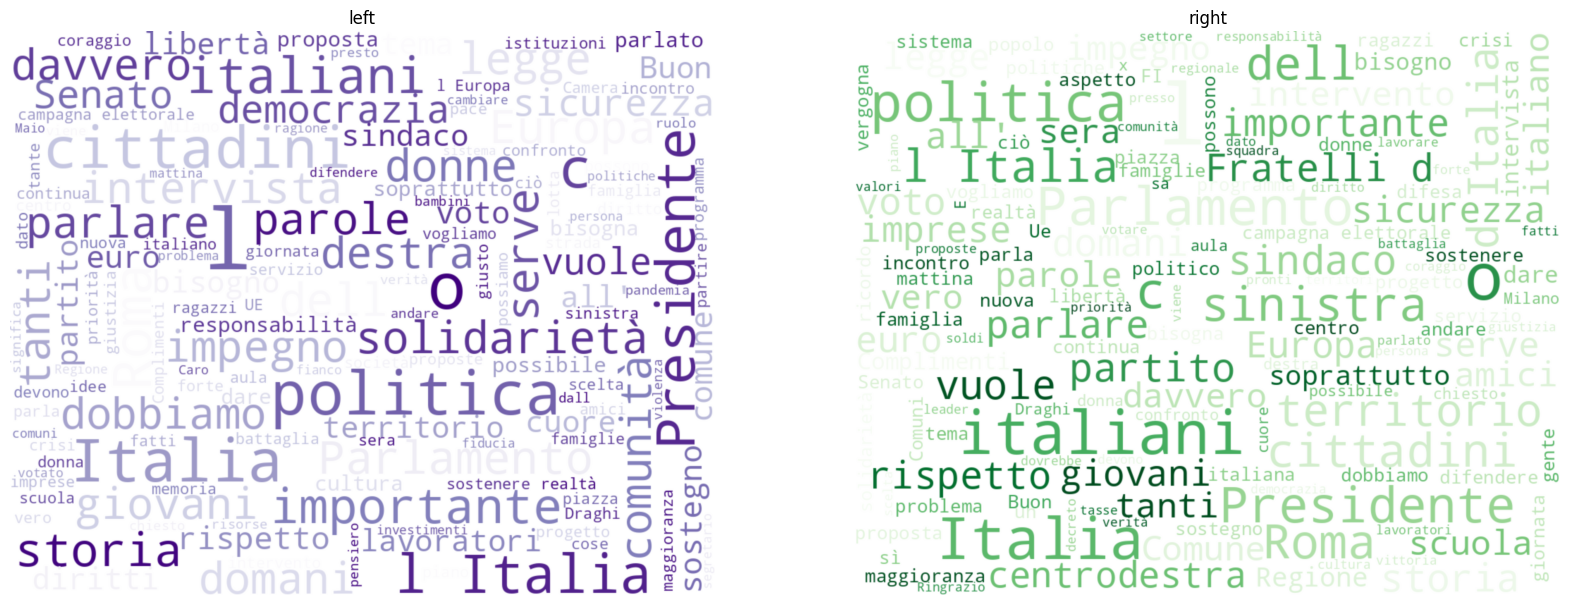

In [ ]:

figure, axis = plt.subplots(1, 2, figsize=(20,20))
colormaps = ['Purples', 'Greens']
for i, ideology in enumerate(['left', 'right']):
  word_cloud = WordCloud(width = 1000,
                       height = 800,
                       colormap = colormaps[i],
                       margin = 0,
                       max_words = 150,
                       max_font_size = 120, min_font_size = 15,
                       background_color = "white").generate(" ".join(ideology_wordList[ideology]))

  axis[i].imshow(word_cloud, interpolation = "gaussian")
  axis[i].axis("off")
  axis[i].set_title(ideology)

  word_cloud.to_file("img/" + ideology + "_binary_wc.png")

**Multiclass Ideology Wordcloud**

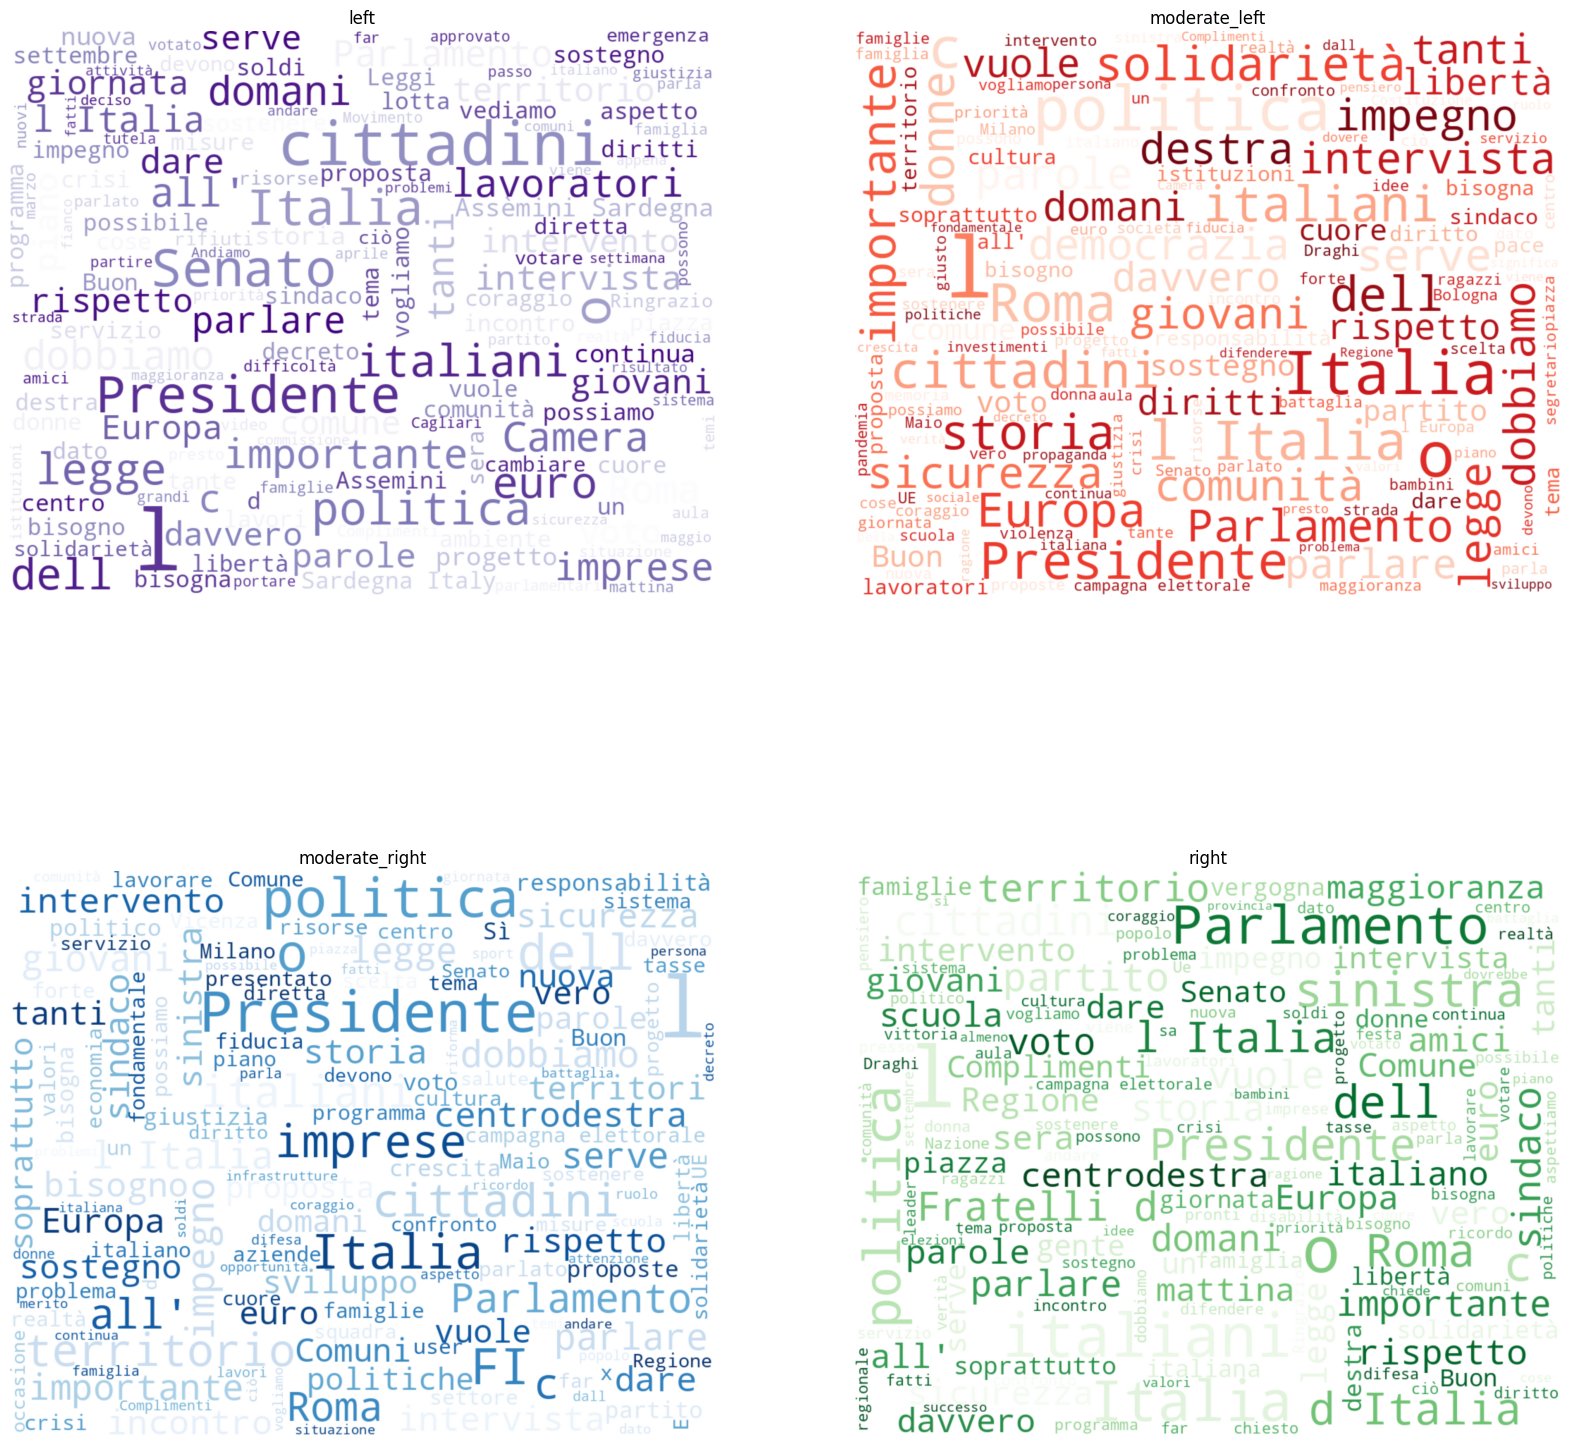

In [ ]:
figure, axis = plt.subplots(2, 2, figsize=(20,20))
colormaps = ['Purples', 'Reds', 'Blues', 'Greens']
for i, ideology in enumerate(['left', 'moderate_left', 'moderate_right', 'right']):
  word_cloud = WordCloud(width = 1000,
                       height = 800,
                       colormap = colormaps[i],
                       margin = 0,
                       max_words = 150,
                       max_font_size = 120, min_font_size = 15,
                       background_color = "white").generate(" ".join(ideology_multiclass_wordList[ideology]))
  plt.subplot(2,2,i + 1)
  plt.imshow(word_cloud, interpolation = "gaussian")
  plt.axis("off")
  plt.title(ideology)

  word_cloud.to_file("img/" + ideology + "_wc.png")

Salvataggio word lists

In [ ]:
np.save("test",l)
#10 loops, best of 3: 115 ms per loop

np.load("test.npy")
#100 loops, best of 3: 2.35 ms per loop

In [ ]:
import numpy as np

project_dir = 'gdrive/My Drive/HLT_proj/'

In [ ]:
np.save(project_dir + "male", gender_wordList['male'])
np.save(project_dir + "female", gender_wordList['female'])

In [ ]:
np.save(project_dir + "left_bin", ideology_wordList['left'])
np.save(project_dir + "right_right", ideology_wordList['right'])

In [ ]:
np.save(project_dir + "left", ideology_multiclass_wordList['left'])
np.save(project_dir + "moderate_left", ideology_multiclass_wordList['moderate_left'])
np.save(project_dir + "right", ideology_multiclass_wordList['right'])
np.save(project_dir + "moderate_right", ideology_multiclass_wordList['moderate_right'])